<a href="https://colab.research.google.com/github/jseeun00/ESAA_2021-2/blob/main/10%EC%A3%BC%EC%B0%A8_%ED%95%84%EC%82%AC2_Kaggle_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('C:/Users/user/Desktop/insurance.csv')

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [ ]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

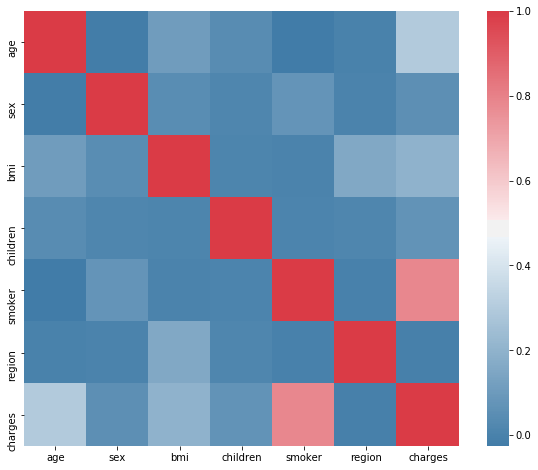

In [ ]:
f, ax = pl.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

In [ ]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
p = figure(title="Distribution of charges",tools="save",
            background_fill_color="#E8DDCB")
hist, edges = np.histogram(data.charges)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'Pr(x)'
show(gridplot([[p]], plot_width=400, plot_height=400, toolbar_location=None))

Loading BokehJS ...

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

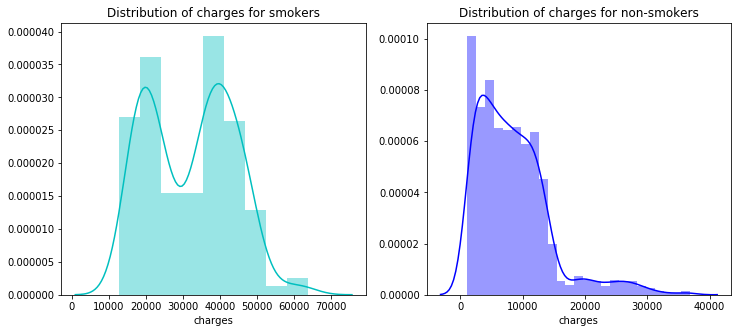

In [ ]:
f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')



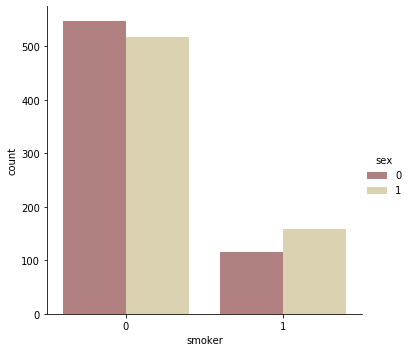

In [ ]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)

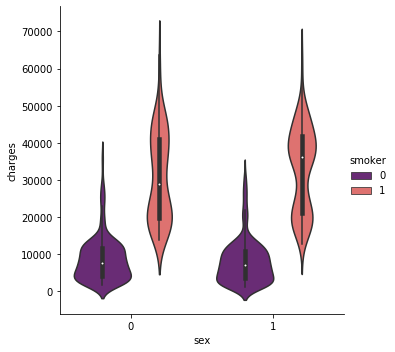

In [ ]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=data, palette = 'magma')


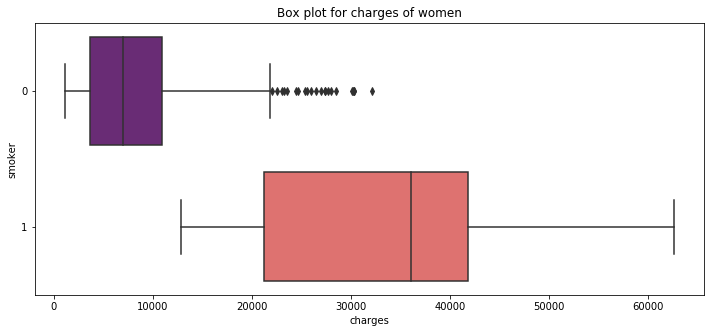

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'magma')

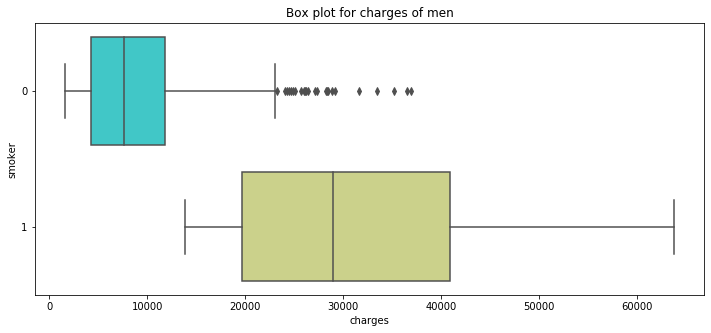

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'rainbow')

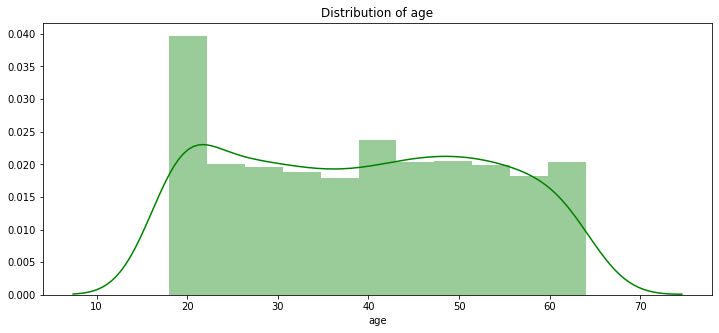

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

Text(0.5, 1, 'The number of smokers and non-smokers (18 years old)')

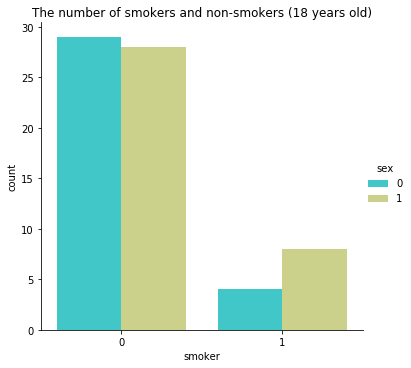

In [ ]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data.age == 18)])
pl.title("The number of smokers and non-smokers (18 years old)")

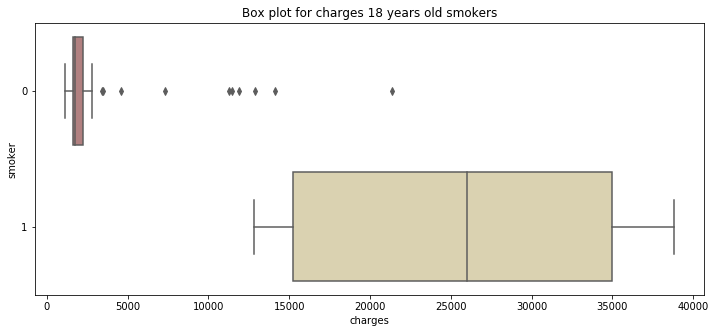

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'pink')

Text(0.5, 1, 'Distribution of charges and age for non-smokers')

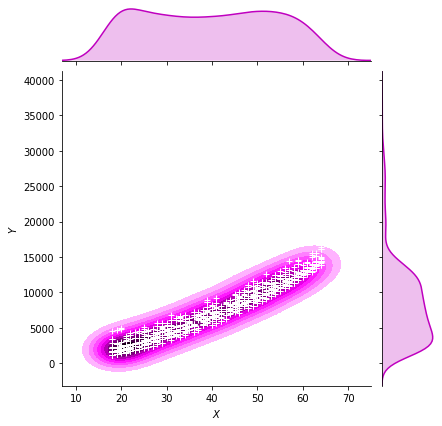

In [ ]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 0)],kind="kde", color="m")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

Text(0.5, 1, 'Distribution of charges and age for smokers')

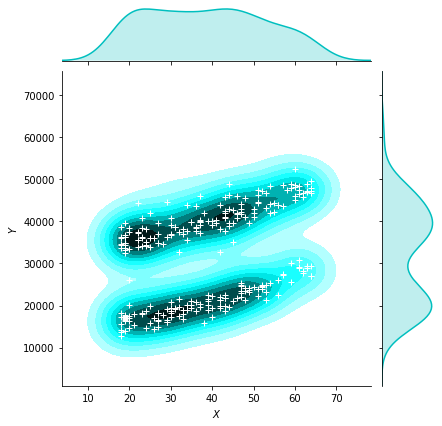

In [ ]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 1)],kind="kde", color="c")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')

In [ ]:
#non - smokers
p = figure(plot_width=500, plot_height=450)
p.circle(x=data[(data.smoker == 0)].age,y=data[(data.smoker == 0)].charges, size=7, line_color="navy", fill_color="pink", fill_alpha=0.9)

show(p)

In [ ]:
#smokers
p = figure(plot_width=500, plot_height=450)
p.circle(x=data[(data.smoker == 1)].age,y=data[(data.smoker == 1)].charges, size=7, line_color="navy", fill_color="red", fill_alpha=0.9)
show(p)

Text(0.5, 1, 'Smokers and non-smokers')

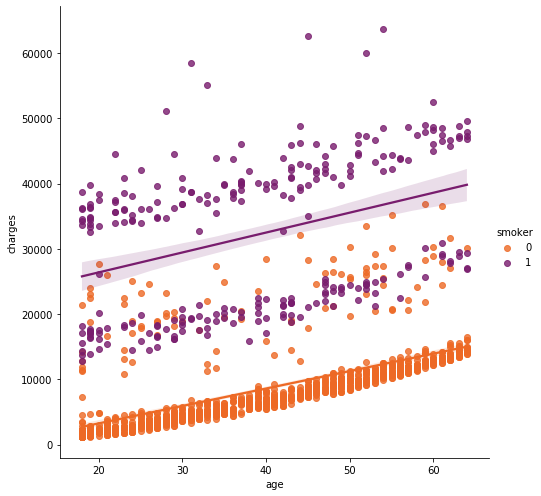

In [ ]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')

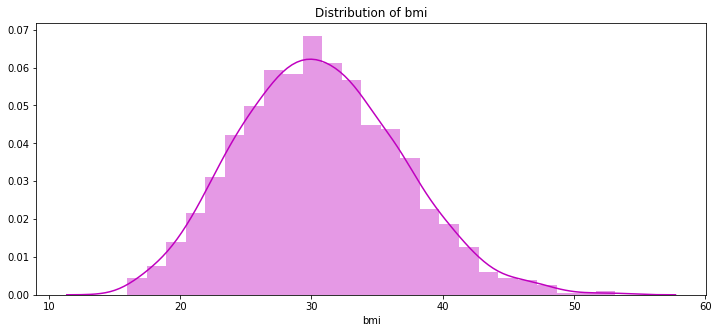

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

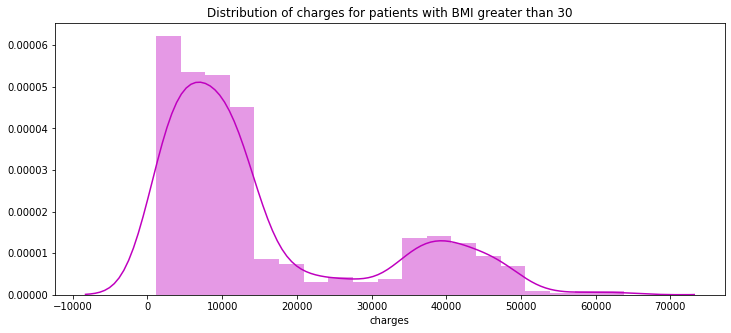

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')

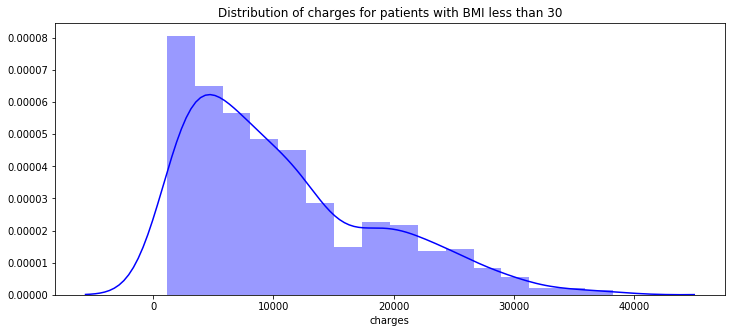

In [ ]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')

###**BMI와 요금 분포**

Text(0.5, 1, 'Distribution of bmi and charges')

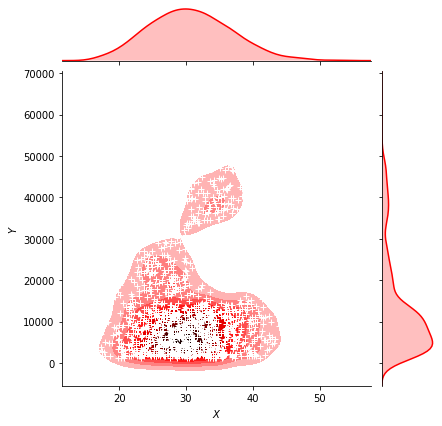

In [ ]:
# jointplot(): 두 변수를 각각 relational plot과 distribution plot로 나타내서 한 번에 그려줌
g = sns.jointplot(x="bmi", y="charges", data = data, kind="kde", color="r") # x축은 bmi, y축은 요금인 커널 밀도 추정 그래프, 색상은 red
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+") #중간의 main plot은 plot_joint()로 설정
g.ax_joint.collections[0].set_alpha(0) 
g.set_axis_labels("$X$", "$Y$") 
ax.set_title('Distribution of bmi and charges') 

###**BMI와 요금의 산점도 및 선형회귀선**

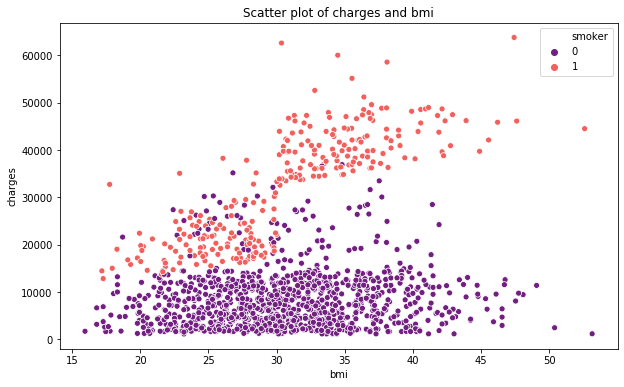

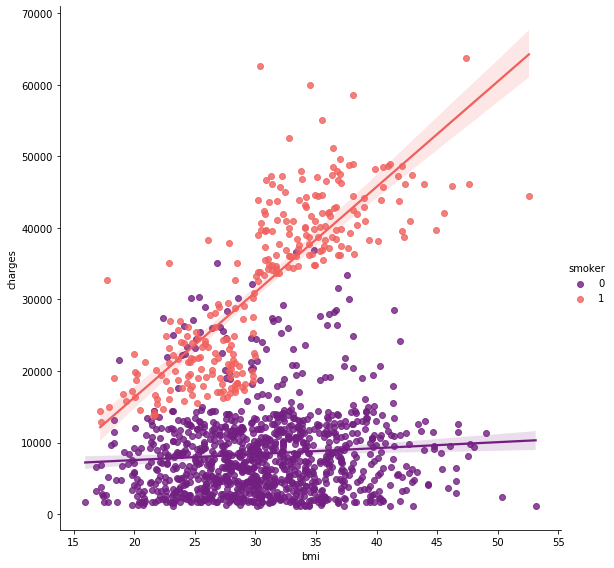

In [ ]:
pl.figure(figsize=(10,6)) 
ax = sns.scatterplot(x='bmi',y='charges', data=data, palette='magma', hue='smoker') #산점도 ; hue옵션으로 클래스 구분
ax.set_title('Scatter plot of charges and bmi') 

#lmplot(): 두 변수간 관계를 산점도로 표현, 회귀선 표시
sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'magma', size = 8) 

###**환자의 자녀수 분포**

-> Let's pay attention to children. First, let's see how many children our patients have.

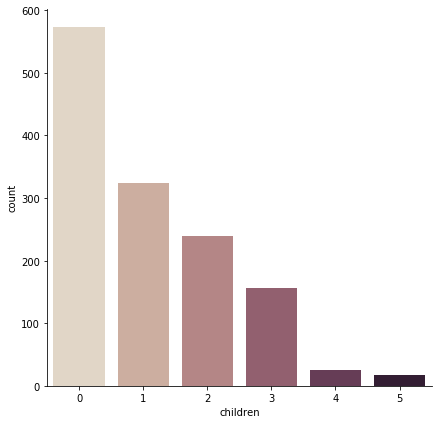

In [ ]:
#catplot(): 3 개 이상의 카테고리 값에 의한 분포 변화를 보여줌
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, size = 6) #항목별 빈도수

# 대부분의 환자들이 자녀가 없다. 자녀가 있는 사람들의 흡연여부를 알아보자.

###**성별에 따른 흡연자와 비흡연자의 자녀 여부**

Text(0.5, 1, 'Smokers and non-smokers who have childrens')

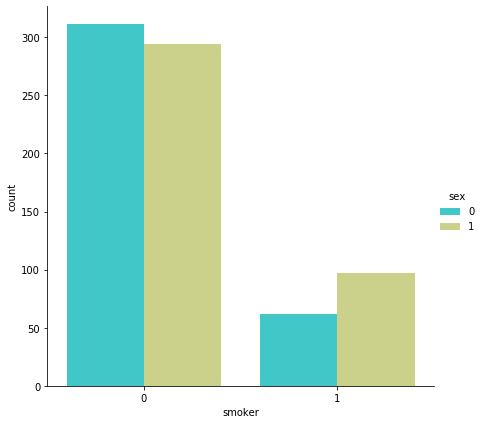

In [ ]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex", data=data[(data.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have childrens')
#자녀가 있는 흡연자수보다 자녀가 있는 비흡연자 수가 더 많다.

###**치료비용 예측**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

###**선형회귀**

In [ ]:
x = data.drop(['charges'], axis = 1)
y = data.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0) #학습 데이터 세트와 테스트 데이터 세트 분할
lr = LinearRegression().fit(x_train,y_train) #선형회귀모델 생성, 학습 수행
y_train_pred = lr.predict(x_train) #예측 수행
y_test_pred = lr.predict(x_test) 

print(lr.score(x_test,y_test)) #선형 회귀를 수행한 결과; 결정 계수 R^2 점수를 계산하는 score() 메서드

#데이터 정규화가 없이 수행한 결과임을 감안하면, 성능이 나쁘지는 않습니다

0.7962732059725786


###**다항회귀**

In [ ]:
X = data.drop(['charges','region'], axis = 1)
Y = data.charges

quad = PolynomialFeatures (degree = 2) # 현재 데이터를 다항식 형태로 변경, degree로 차수 조절
x_quad = quad.fit_transform(X) #다항식 모델에 x를 fit transform하여 새로운 데이터를 생성

X_train,X_test,Y_train,Y_test = train_test_split(x_quad, Y, random_state = 0) #학습 데이터 세트와 테스트 데이터 세트 분할

plr = LinearRegression().fit(X_train,Y_train) #변환된 polynomial 피처에 선형회귀를 적용해 다항회귀 구현, 학습 수행

Y_train_pred = plr.predict(X_train) #예측 수행
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test)) #이 다항회귀모델의 결정계수는 0.88로 꽤 좋은 모델이다 

0.8849197344147238


###**랜덤포레스트**

In [ ]:
forest = RandomForestRegressor(n_estimators = 100, 
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1) #결정트리 개수가 100, 기준은 mse, 
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)
#학습과 예측 수행

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred))) #372만 9086/ 1993만 3832 

MSE train data: 3729086.094, MSE test data: 19933823.142
R2 train data: 0.974, R2 test data: 0.873


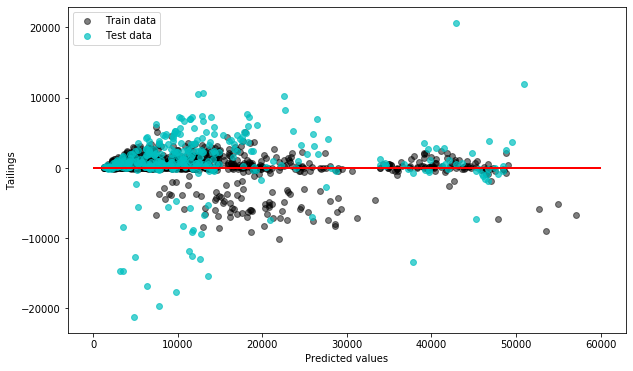

In [ ]:
pl.figure(figsize=(10,6))

pl.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
pl.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
pl.xlabel('Predicted values')
pl.ylabel('Tailings')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
pl.show()

#train dataset보다 청록색 점들인 test data 예측값들이 선에서 더 멀리 떨어져있음
#따라서 test dataset에서 성능이 더 낮음을 직관적으로 볼 수 있는 그래프